# EcoFOCIpy ADCP QC - 19BSP-2A

- mostly interpolated <1hr gaps
- INITIAL DATA WAS SAMPLED AT 20MINUTE - create an hourly subsample (just decimate)


In [29]:
import xarray as xa
import numpy as np
import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [30]:
xdf = xa.load_dataset('19bsp2a_wcp_velein_0055m.nc')

In [31]:
len(xdf.depth)

18

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

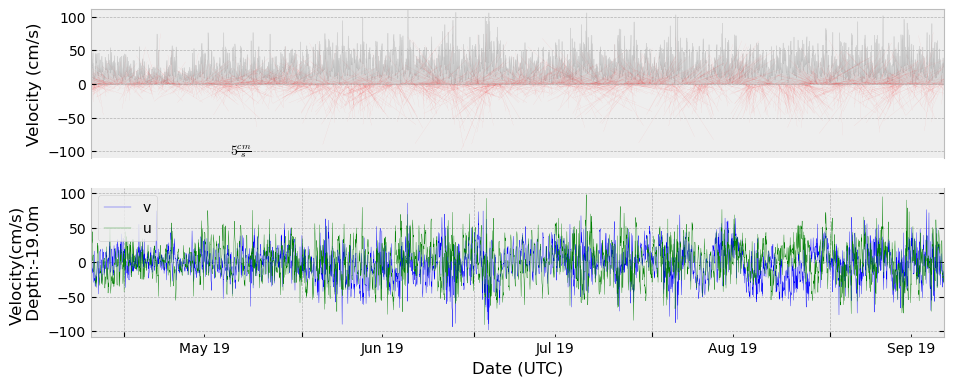

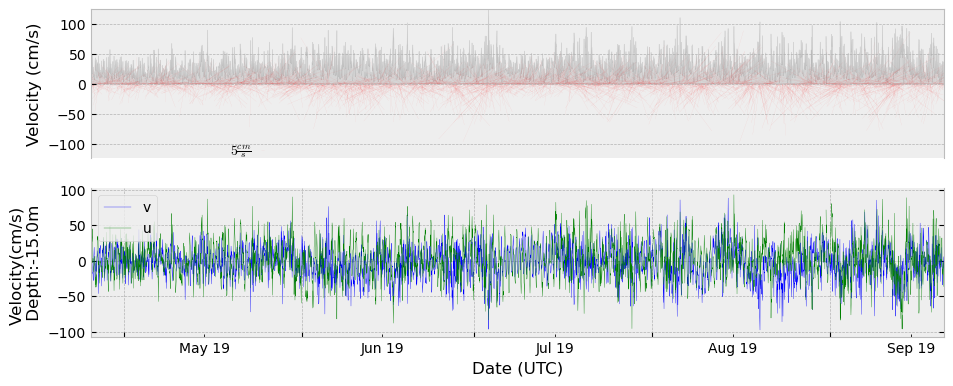

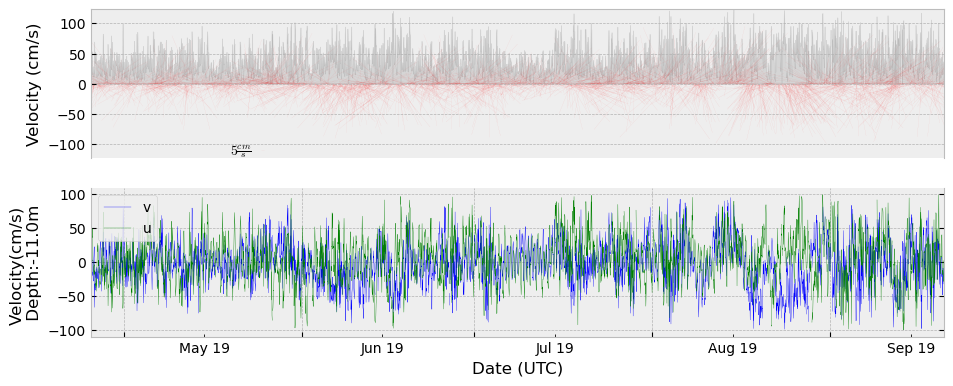

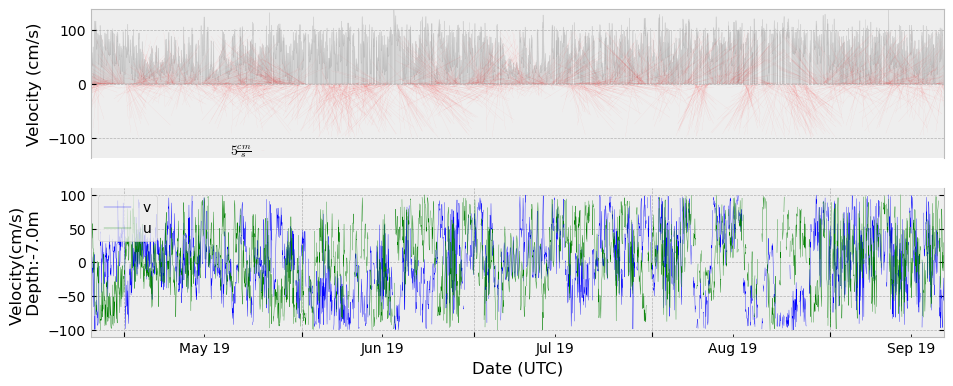

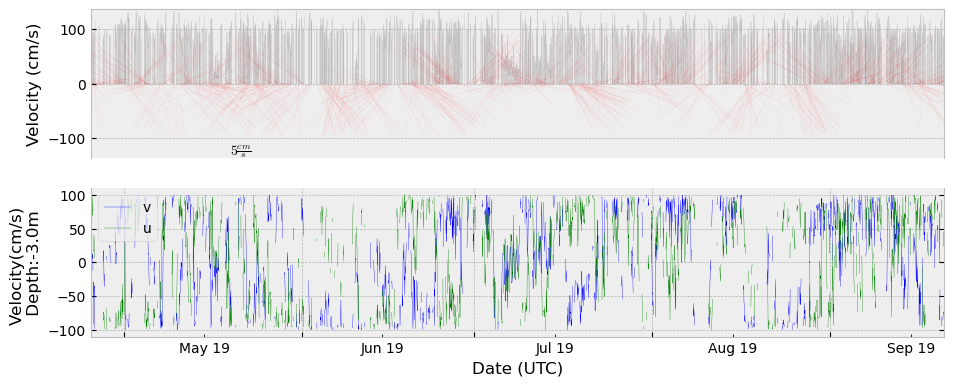

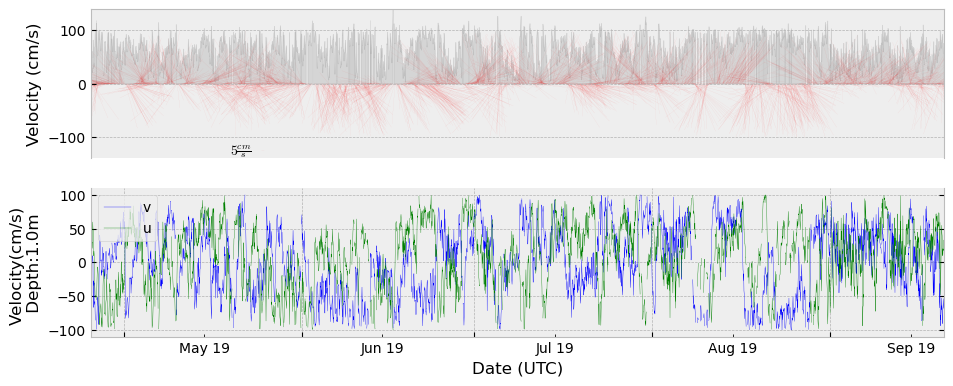

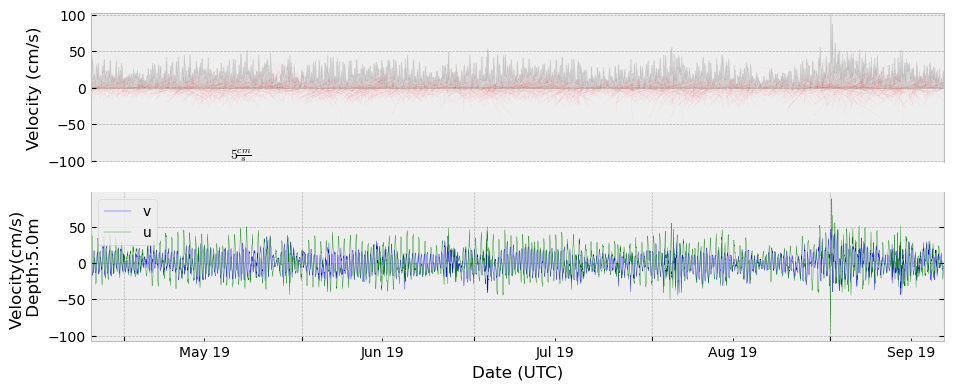

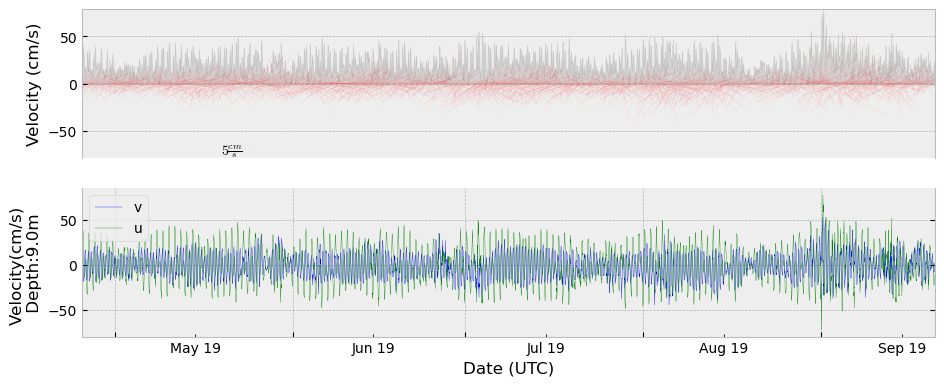

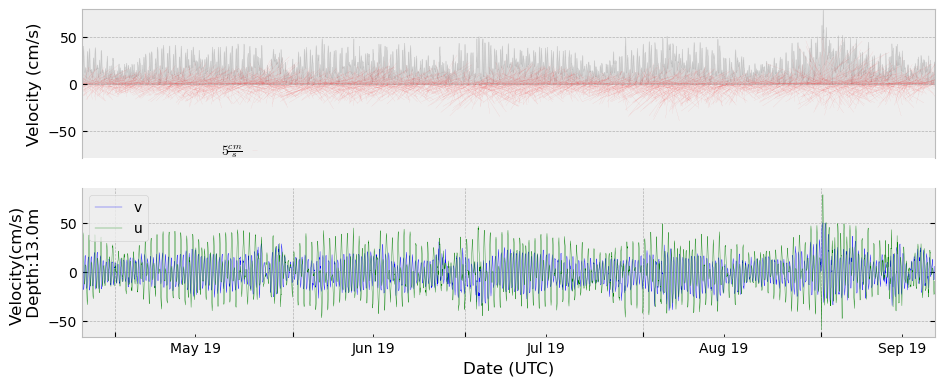

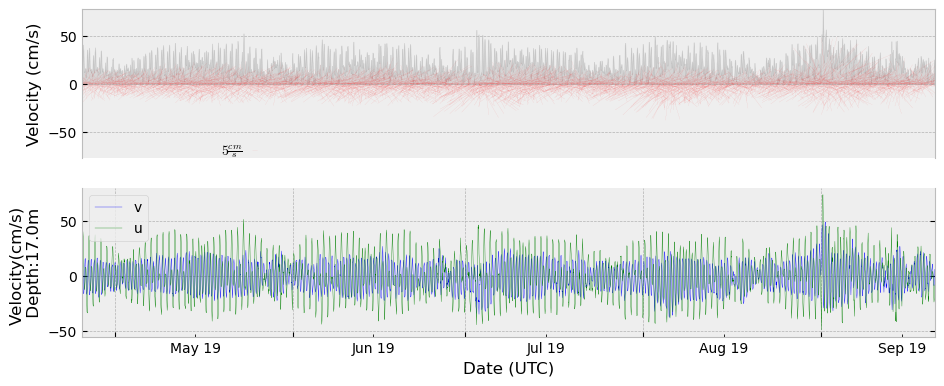

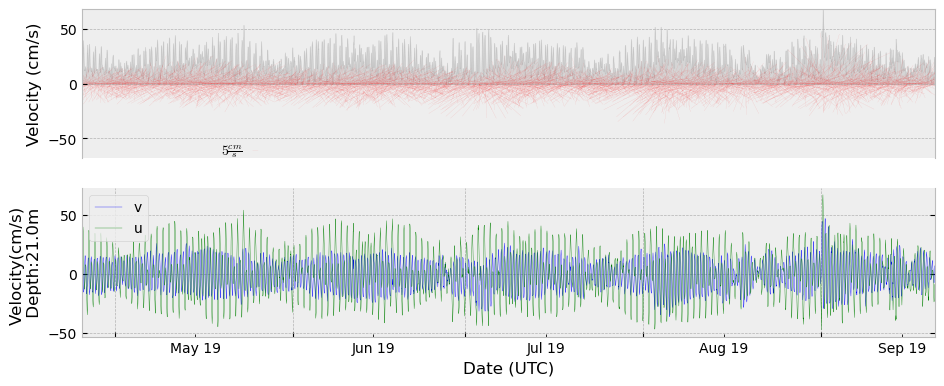

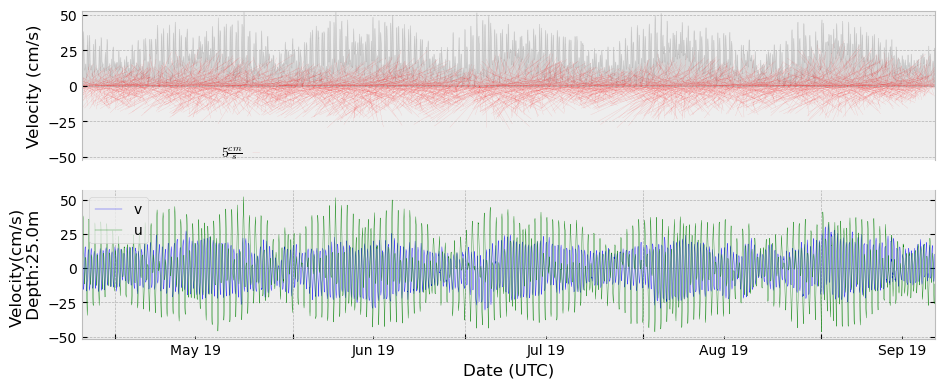

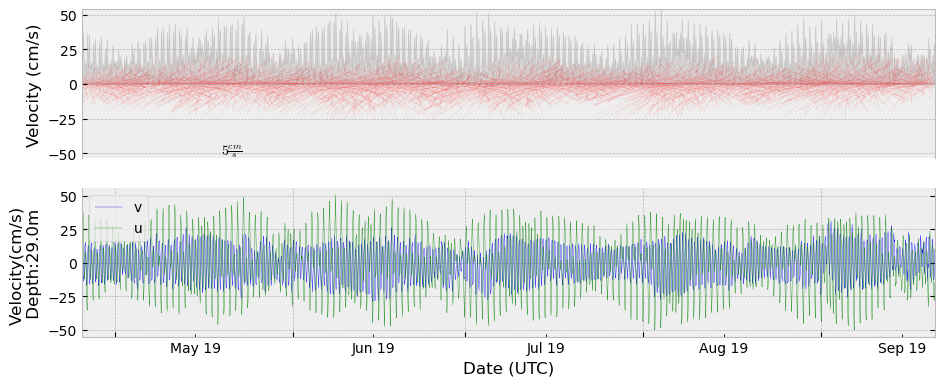

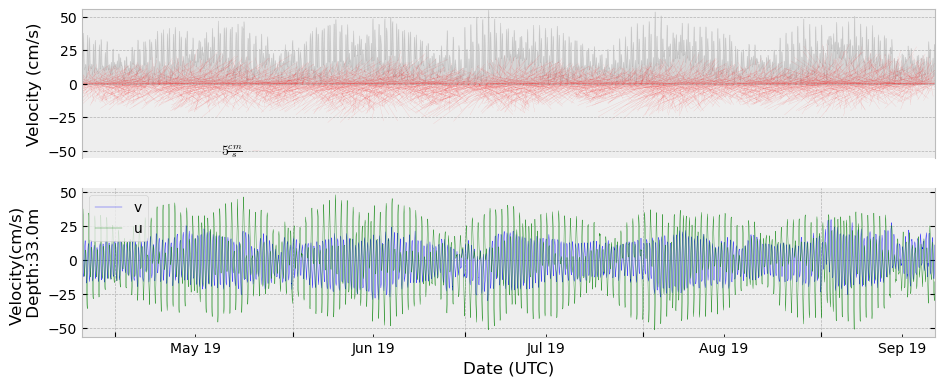

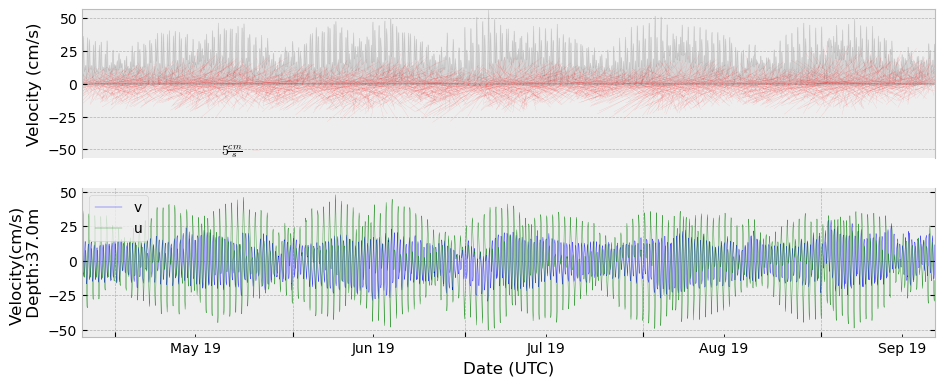

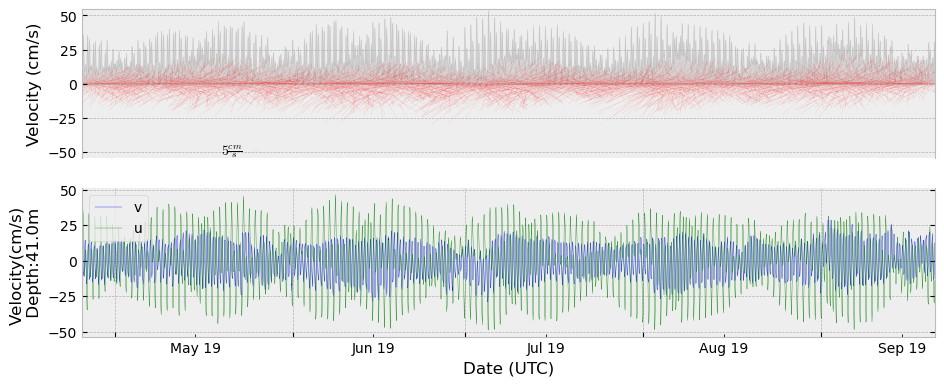

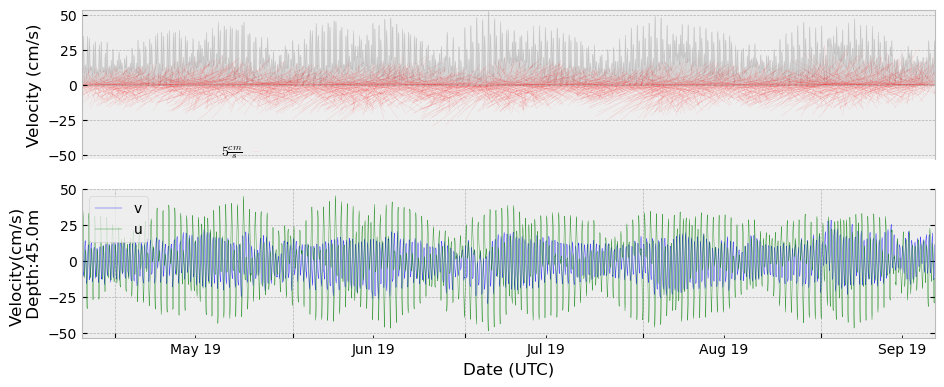

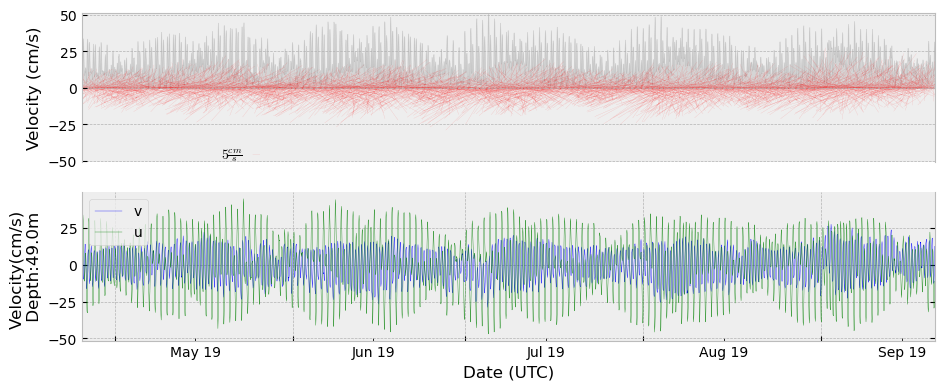

In [34]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [35]:
xdf =xdf.where(np.abs(xdf.u_curr_comp) <=100,np.nan)
xdf =xdf.where(np.abs(xdf.v_curr_comp) <=100,np.nan)
xdf

<xarray.Dataset> Size: 4MB
Dimensions:          (latitude: 1, longitude: 1, time: 3563, depth: 18)
Coordinates:
  * time             (time) datetime64[ns] 29kB 2019-04-25T07:00:00 ... 2019-...
  * depth            (depth) float64 144B -19.0 -15.0 -11.0 ... 41.0 45.0 49.0
  * latitude         (latitude) float64 8B 56.87
  * longitude        (longitude) float64 8B -164.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 513kB 17.01 ....
    v_curr_comp      (latitude, longitude, time, depth) float64 513kB 14.29 ....
    w_curr_comp      (latitude, longitude, time, depth) float64 513kB -1.2 .....
    w_curr_comp_err  (latitude, longitude, time, depth) float64 513kB 8.3 ......
    agc1             (latitude, longitude, time, depth) float64 513kB 84.0 .....
    agc2             (latitude, longitude, time, depth) float64 513kB 86.0 .....
    agc3             (latitude, longitude, time, depth) float64 513kB 91.0 .....
    agc4             (latitude, longitude, time, depth) float64 513kB 88.0 .....
Attributes: (12/13)
    Latitude_DegMMddW:                      56 52.240 N
    Longitude_DegMMddN:                     164 04.610 W
    MooringID:                              19BSP-2A
    platform_deployment_date:               2019-04-25T06:57:00Z
    platform_deployment_cruise_name:        DY1904
    platform_recovery_date:                 2019-09-20T17:17:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             72.0
    date_created:                           2025-03-26T08:31:47Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.\nTrimmed t...

In [36]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

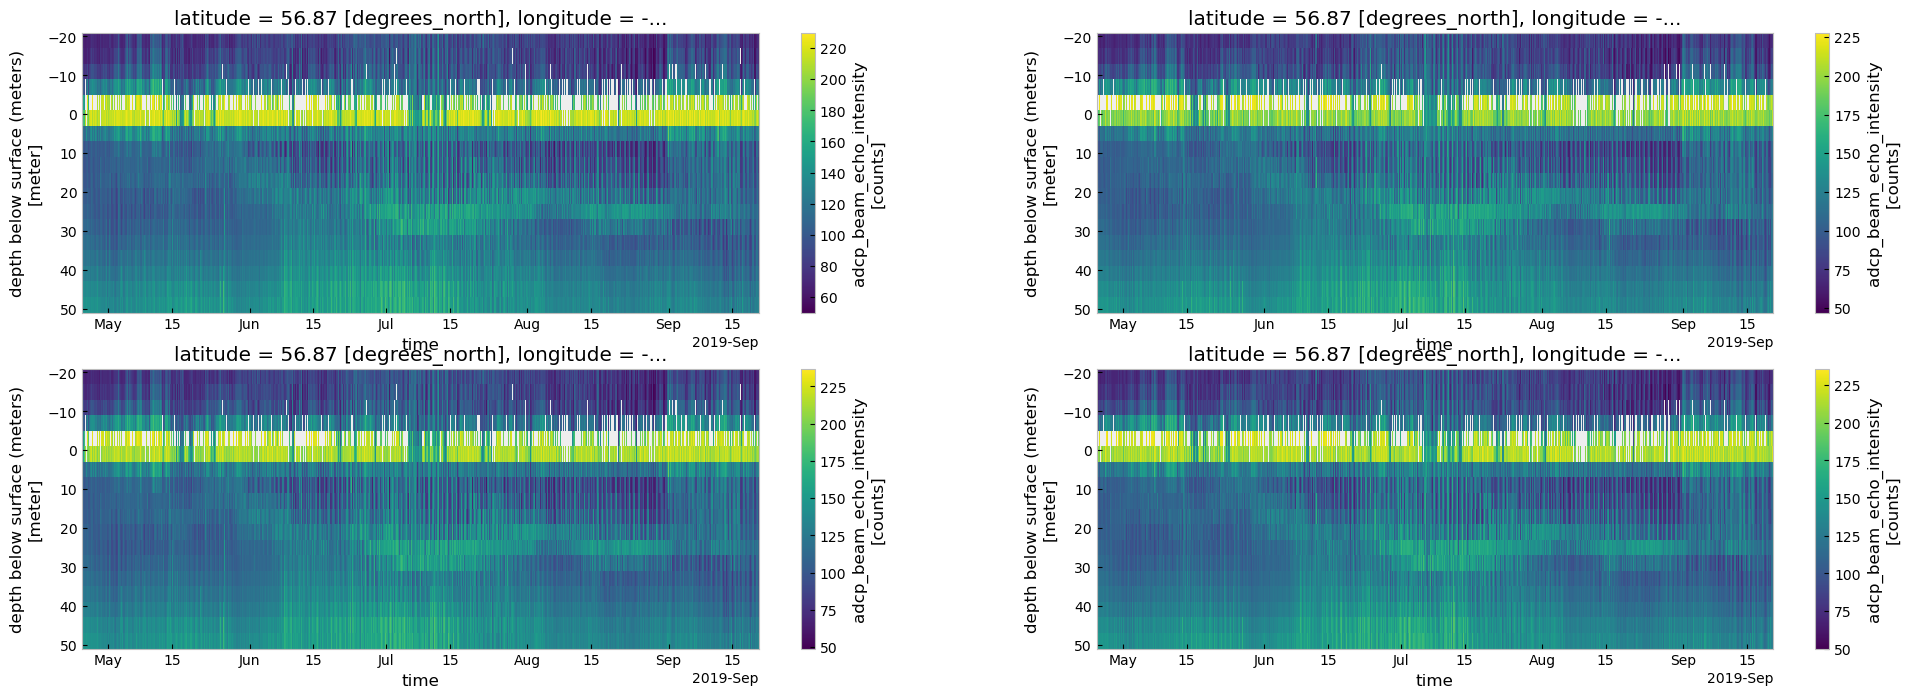

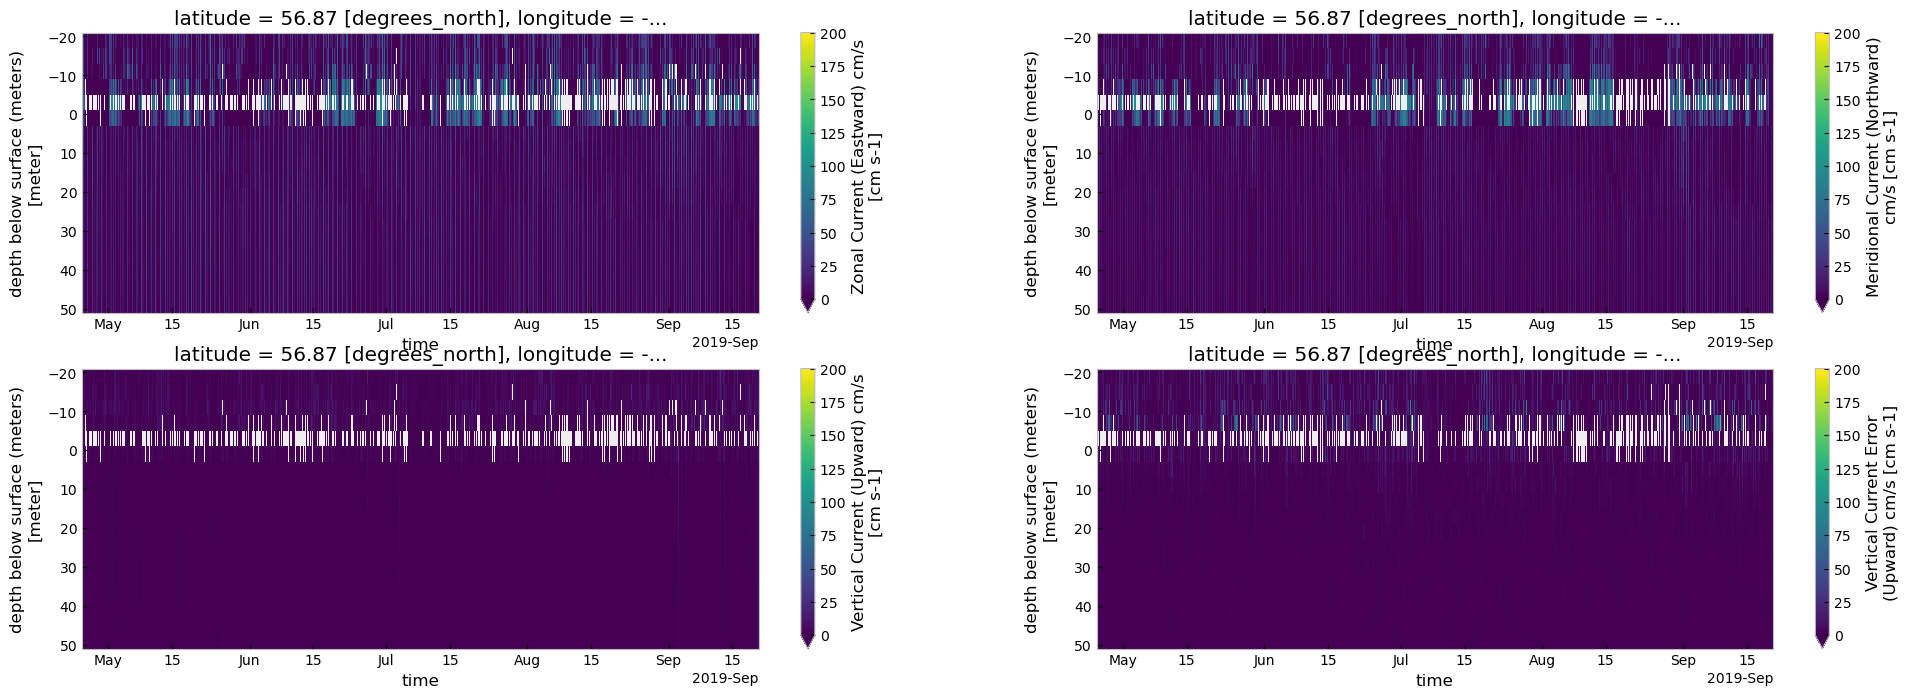

In [37]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [38]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >100cm/s'    

## Trim above surface (negative values)

In [39]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [40]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [41]:
ixdf.to_netcdf('19bsp2a_wcp_velein_0055m.trimmed.nc')

In [42]:
xdf = xa.load_dataset('19bsp2a_wcp_velein_0055m.trimmed.nc')

## Interpolate over singleton missing gaps linearly

In [43]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2h')

In [44]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [45]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [46]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

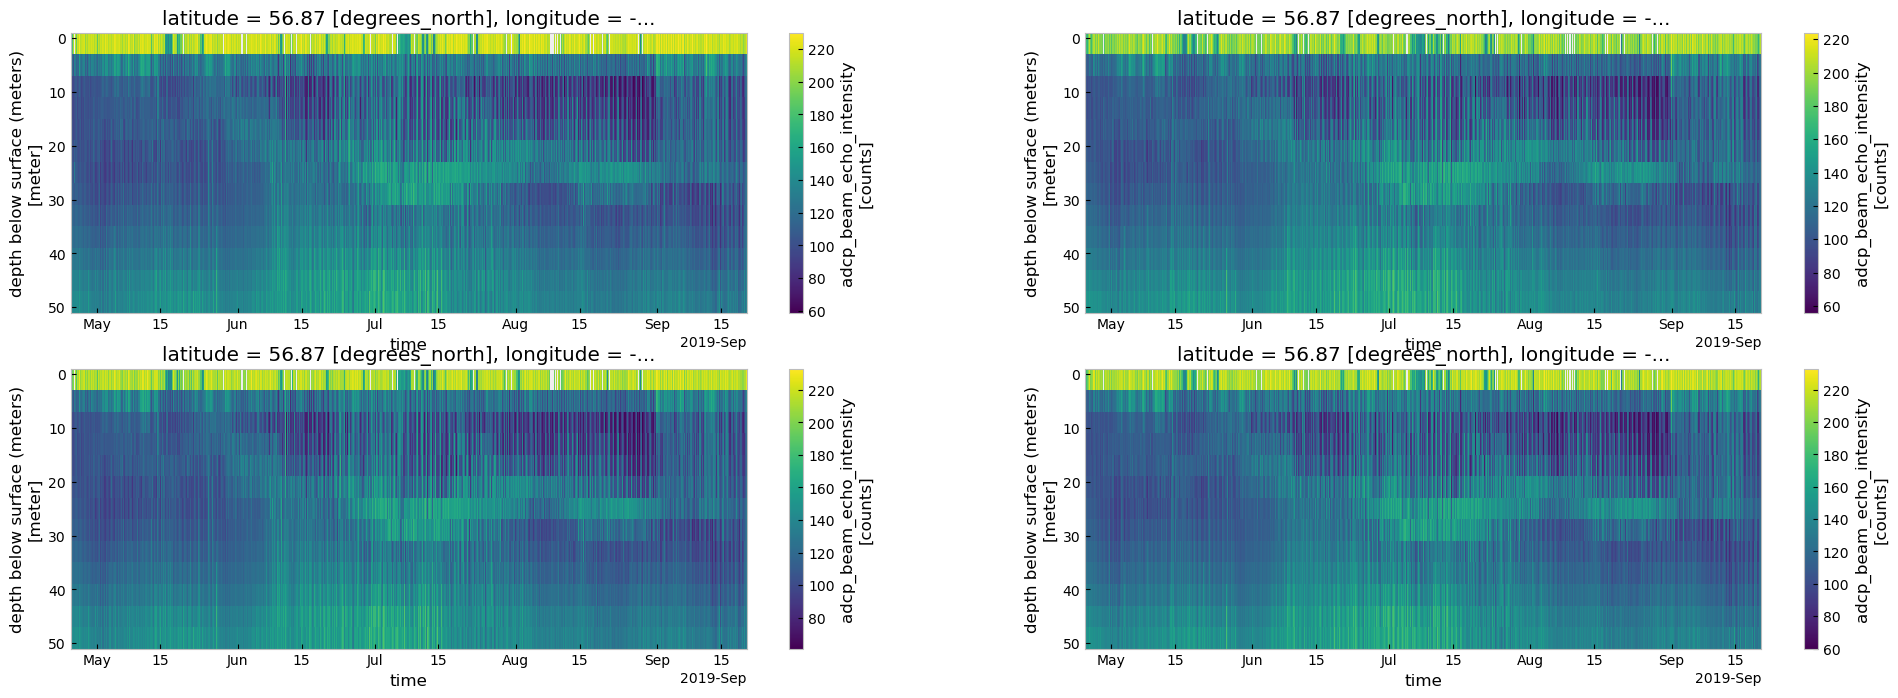

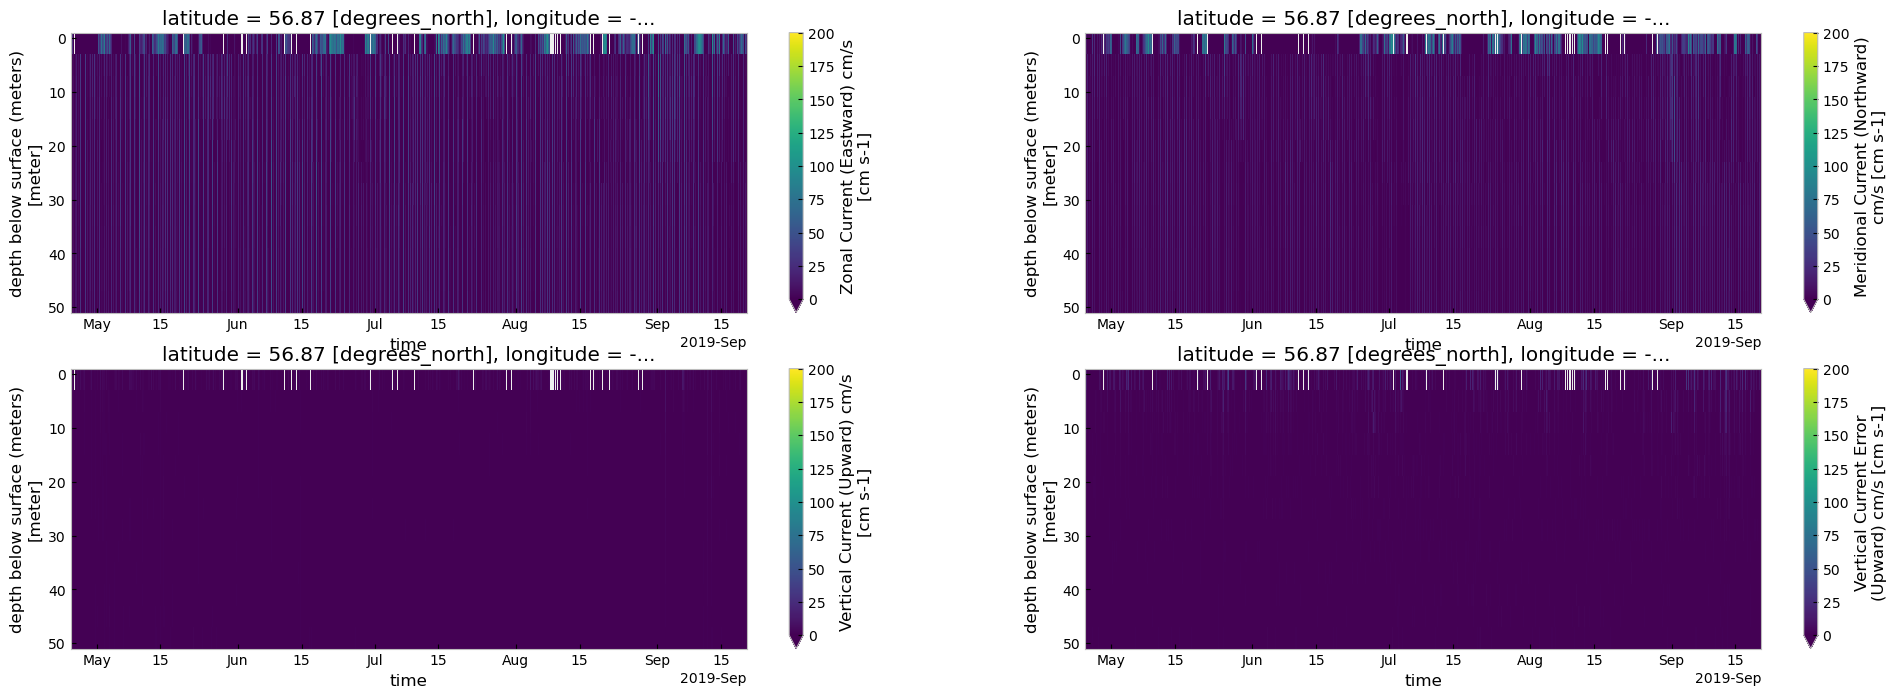

In [47]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [48]:
ixdf.to_netcdf('19bsp2a_wcp_velein_0055m.filtered.nc')

In [ ]:
## Another decimation option - not too far removed from my time.dt.minutes = 0 as long as clock is close

In [14]:
#decimate to hourly data
# ixdf.resample(time="1H").nearest(tolerance="1H").to_netcdf('/Users/bell/ecoraid/2019/Moorings/19bsp2a/final_data_cf/19bsp2a_velein_0055m.nc')